In [8]:
import mglearn

### <u>선형모델</u>

`선형 모델`은 입력 특성에 대한 `선형 함수`를 만들어 예측을 수행한다.

---

#### <u>회귀의 선형 모델</u>

회귀의 경우 선형 모델을 위한 일반화된 예측 함수는 다음과 같다.

> ŷ = w[0] × x[0] + w[1] × x[1] + … + w[p] × x[p] + b

이 식에서 `x[0] ~ x[p]`까지 하나의 <b>데이터 포인트에 대한 특성</b>을 나타내며(특성의 개수는 p+1개)<br>
`w`와 `b`는 모델이 <b>학습할 파라미터</b>이다.<br>
마지막으로 `ŷ`는 모델이 만들어낸 <b>예측값</b>이다.

<br>

만약 특성이 하나인 데이터셋이라면 이 식은 다음과 같아진다.

> ŷ = w[0] × x[0] + b

이 식에서 `w[0]`는 기울기고 `b`는 y축과 만나는 절편이다.<br>
특성이 많아지면 `w`는 <u>각 특성에 해당하는 기울기를 모두 가지게되는 것</u>이다!<br>
다르게 생각하면 <b>예측값</b>은 입력 특성 `w`의 <u>각 가중치를 곱해서 더한 가중치합</u>으로 볼 수 있다. 

이제 1차원 `wave 데이터셋`으로 파라미터 `w[0]`와 `b`를 직선처럼 학습시켜보면 다음과 같다.

w[0]: 0.393906  b: -0.031804


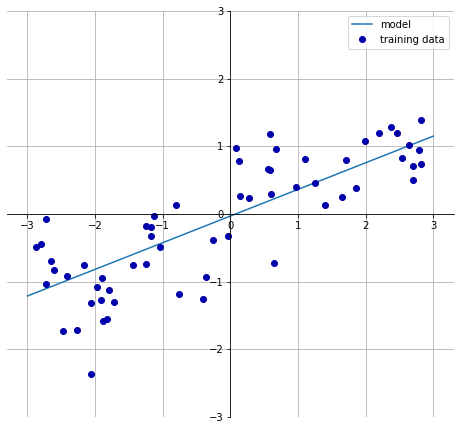

In [4]:
mglearn.plots.plot_linear_regression_wave()

직선 방정식을 이해하기 쉽도록 그래프의 중앙을 가로질러서 x, y축이 그려져있다.<br>

회귀를 위한 선형모델은

- 특성 한개 -> 직선
- 특성 두개 -> 평면
- 더 많은 특성 -> 초평면(hyperplane)

이 되는 회귀 모델의 특징을 가지고 있다.

특히 <u>특성이 많은 데이터셋</u>이라면 `선형 모델`은 매우 휼륭한 성능을 낼 수 있다.<br>
<u>훈련 데이터보다 특성이 더 많은 경우</u>엔 어떤 타깃 y도 완벽하게 (훈련 세트에 대해서) 선형 함수로 모델링할 수 있다.

회귀를 위한 선형 모델은 다양하다.<br>
이 모델들은 훈련 데이터로부터 모델 파라미터 `w`와 `b`를 <u>(1)학습하는 방법</u>과 <u>(2)모델의 복잡도를 제어하는 방법</u>에서 차이가 난다. 회귀에서 가장 인기 있는 선형 모델들을 살펴보자

---

#### <u>선형 회귀(최소제곱법)</u>

`선형회귀(linear regression)`또는 `최소제곱법(OLS, ordinary least squares)`는 가장 간단하고 오래된 회귀용 선형 알고리즘이다.<br>

`선형회귀`는 예측과 훈련 세트에 있는 타깃 y 사이의 <u>`평균제곱오차(mean squared error)`를 최소화하는</u> 파라미터 `w`와 `b`를 찾는다.(`평균제곱오차`는 <b>예측값</b>과 <b>타깃값</b>의 차이를 제곱하여 더한 후에 샘플의 개수로 나눈 것이다.) 

<u>`선형회귀`는 매개변수가 없는 것이 장점이지만, 그래서 모델의 복잡도를 제어할 방법이 없다.</u>

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

여기서!<br>
- <b>기울기 파라미터(`w`)</b>
    - `가중치(weight)` 또는 `계수(coefficient)`라고 한다. 
    - Ir객체의 `coef_`속성에 저장되어 있다.

<br>

- <b>절편(intercept) 파라미터(`b`)</b>
    - `편향(offset)`을 의미하기도 한다.
    - Ir객체의 `intercept_`속성에 저장되어 있다.

In [13]:
print('lr.coef_ : ', lr.coef_)
print('lr.intercept_ : ', lr.intercept_)

lr.coef_ :  [0.39390555]
lr.intercept_ :  -0.031804343026759746


> intercept_ 속성은 항상 실수float 값 하나지만, coef_ 속성은 각 입력 특성에 하나씩 대응되는 NumPy 배열입니다. wave 데이터셋에는 입력 특성이 하나뿐이므로 lr.coef_도 원소를 하나만 가지고 있습니다.

`훈련 세트`와 `테스트 세트`의 성능을 확인해보자

In [14]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


`R2`값이 0.66인 것은 그리 좋은 결과에 속하지 않는다.<br>
하지만 `훈련 세트`와 `테스트 세트`의 점수가 매우 비슷한 것을 알 수 있다.<br>
이는 과대적합이아니라 `과소적합` 상태를 의미한다.

위와 같은 1차원 데이터셋에서는 모델이 매우 단순하므로 과대적합을 걱정할 필요가 없다.<br>
그러나, <u>특성이 많은 고차원 데이터셋에서는 선형 모델의 성능이 매우 높아져 과대적합될 가능성이 높다.</u>

그렇다면, `LinearRegression`모델이 복잡한 보스턴 주택가격 데이터셋에서는 어떻게 동작하는지 확인해보자

먼저 데이터셋을 읽고 `훈련 세트`와 `테스트 세트`로 나누고, 이전과 같은 방식으로 선형모델을 만들자

In [15]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [16]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


이번에는 전의 예제와 다르게 `훈련 세트`에서는 매우 정확한 반면, `테스트 세트`에서는 매우 낮습니다.<br>
즉, <u>이는 모델이 `과대적합`되었다는 확실한 신호이므로 복잡도를 제어할 수 있는 모델을 사용해야한다.</u>

따라서, 다음으로 볼 모델은 `리지 회귀`이다.

---

### References

- 안드레아스 뮐러, 세라 가이도, 『파이썬 라이브러리를 활용한 머신러닝』, 박해선, 한빛미디어(2017)
- https://tensorflow.blog/%ed%8c%8c%ec%9d%b4%ec%8d%ac-%eb%a8%b8%ec%8b%a0%eb%9f%ac%eb%8b%9d/2-3-3-%ec%84%a0%ed%98%95-%eb%aa%a8%eb%8d%b8/